Importing libraries and dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv(r"D:\COURSES\Python\Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df=df.drop('customer_id',axis=1)

In [8]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Preprocessing Steps

In [9]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [11]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

Box plot to check outliers

In [12]:
numcols=['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

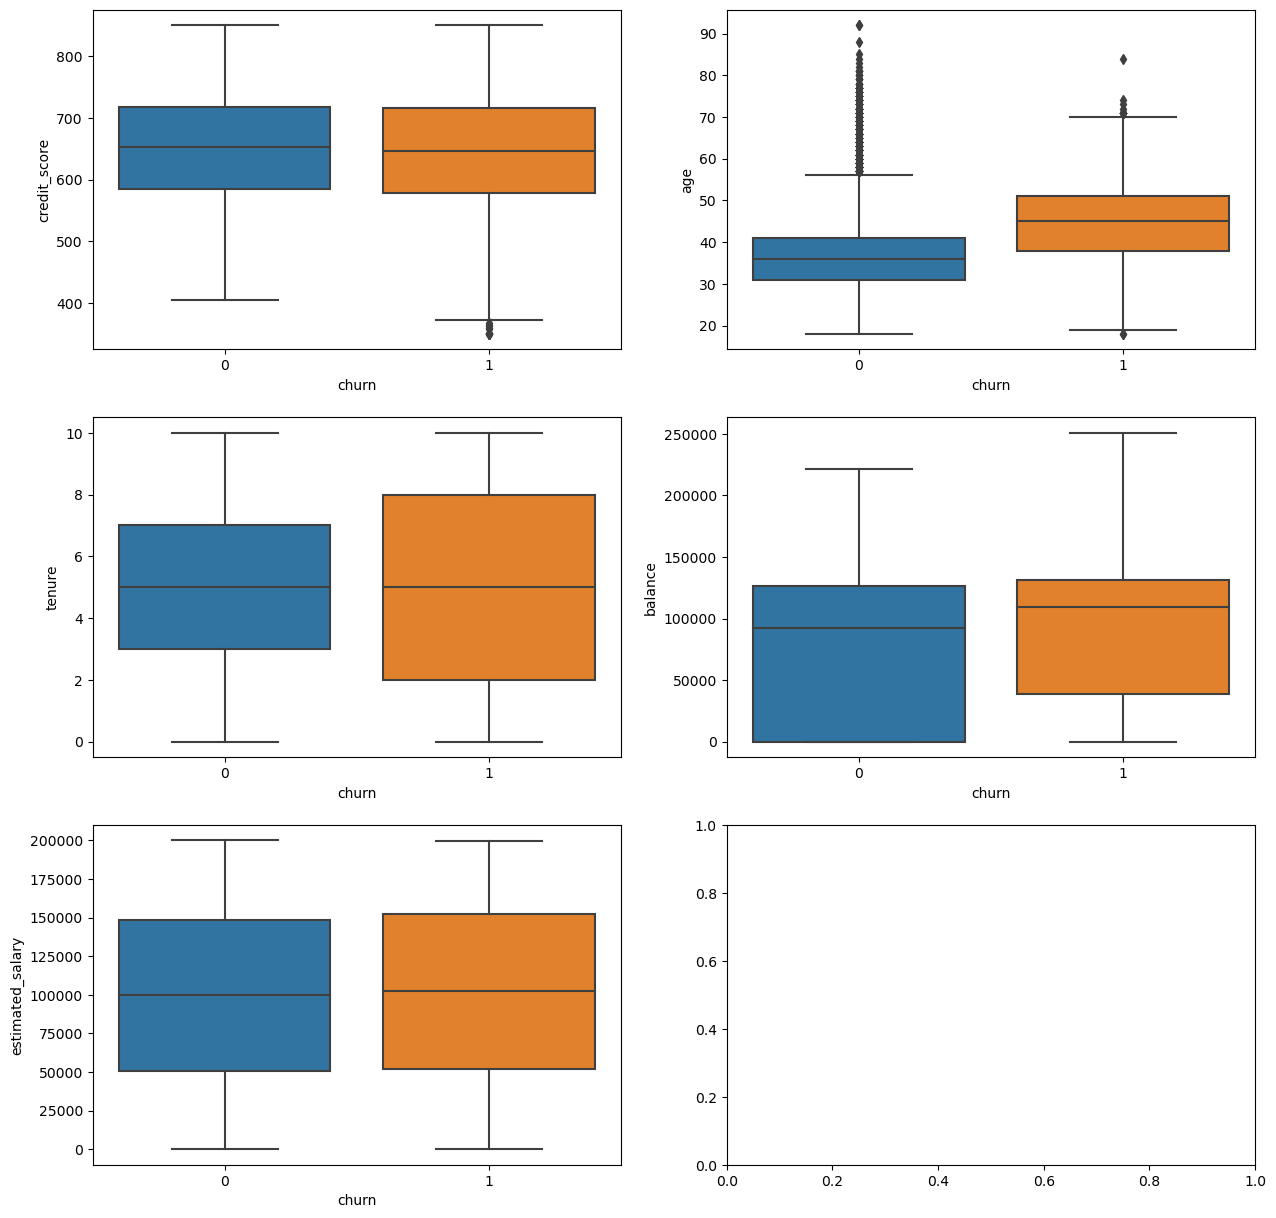

In [13]:
fig,ax=plt.subplots(3,2,figsize=(15,15))

for i, subplot in zip(numcols,ax.flatten()):
    sns.boxplot(x='churn',y=i,data=df,ax=subplot)

Removing outliers using Inter Quartile Range (IQR)

In [14]:
for i in numcols:
    q75,q25=np.percentile(df[i],[75,25])
    iqr=q75-q25
    min_val=q25-(iqr*1.5)
    max_val=q75+(iqr*1.5)

    df=df[(df[i]<max_val)]
    df=df[(df[i]>min_val)]

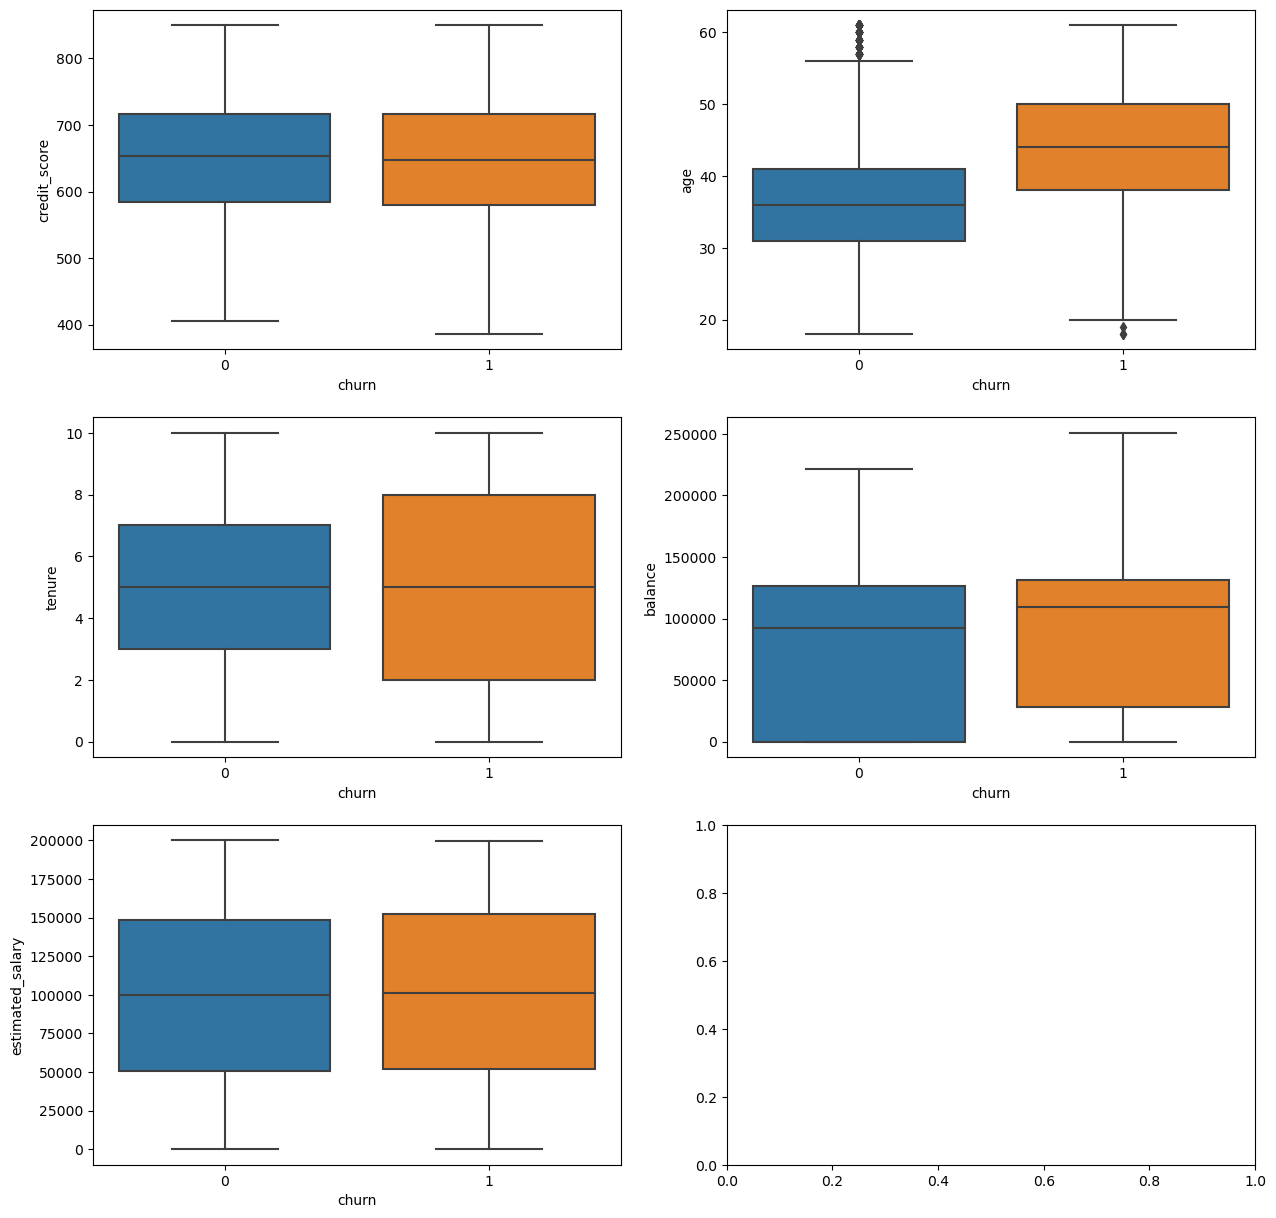

In [15]:
fig,ax=plt.subplots(3,2,figsize=(15,15))

for i, subplot in zip(numcols,ax.flatten()):
    sns.boxplot(x='churn',y=i,data=df,ax=subplot)

In [62]:
#We have removed most of the outliers. Age still has some, but it is better than before.

Transforming non-numerical labels to numerical labels

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
df.country=le.fit_transform(df.country)
df.gender=le.fit_transform(df.gender)

In [19]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


Heatmap showing correlation of features

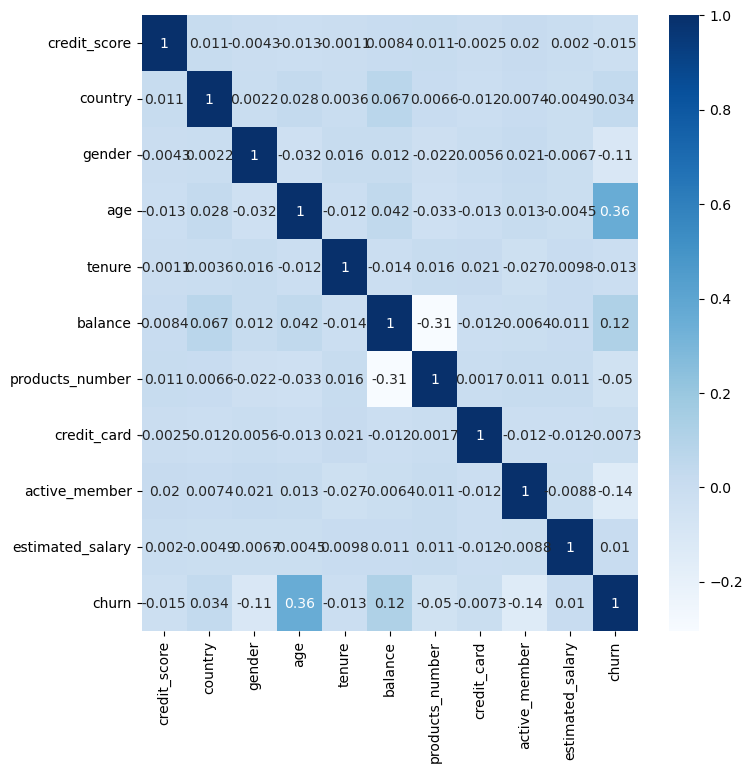

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

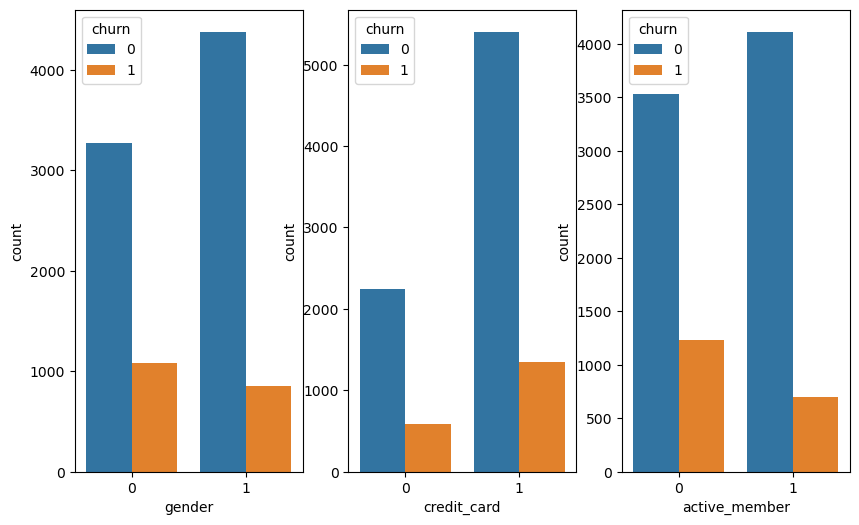

In [21]:
fig,ax=plt.subplots(1,3,figsize=(10,6))
categorical_features=['gender','credit_card','active_member']
for i, subplot in zip(categorical_features, ax.flatten()):
    sns.countplot(x=i,hue='churn',data=df,ax=subplot)

Train Test Split

In [41]:
X=df.drop('churn',axis=1)
y=df['churn']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Model Building

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeClassifier()
param_grid={
    'max_depth': [3,8,13,24,18,30], #sets maximum number of levels in our decision tree. Increasing is good but not too much
    'min_samples_split': [7,8,9,10,11], #tells the model a minimum number of samples that can be split into the next level. Ideal value is btwn 8-10
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9],#tells the model the minimum samples the next level should have (2-6)
    'criterion': ['gini','entropy'] #entropy measures impurity or randomness in data points,gini measures the probability of an instance being misclassified when chosen randomly
}

In [44]:
#gridsearch with crossvalidation
grid_search=GridSearchCV(dtree,param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 8, 13, 24, 18, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [7, 8, 9, 10, 11]})

In [45]:
#finding the best hyperparameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 7}


In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=8,min_samples_leaf=9,min_samples_split=7)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=9,
                       min_samples_split=7, random_state=0)

In [47]:
y_pred=dtree.predict(X_test)
print('Accuracy Score : ',round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy Score :  85.54 %


In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test,y_pred,average='micro')))
print('Precision Score : ',(precision_score(y_test,y_pred,average='micro')))
print('Recall Score : ',(recall_score(y_test,y_pred,average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test,y_pred,average='micro')))
print('Log Loss : ',(log_loss(y_test,y_pred)))

F-1 Score :  0.8553524804177546
Precision Score :  0.8553524804177546
Recall Score :  0.8553524804177546
Jaccard Score :  0.7472627737226277
Log Loss :  4.995976727945437


In [49]:
imp_df=pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance': dtree.feature_importances_
})
fi=imp_df.sort_values(by='Importance', ascending=False)

fi2=fi.head(10)
fi2

,Feature Name,Importance
3,age,0.364312
6,products_number,0.315728
5,balance,0.103872
8,active_member,0.053844
9,estimated_salary,0.052563
1,country,0.042542
0,credit_score,0.034071
2,gender,0.018445
4,tenure,0.012663
7,credit_card,0.001961


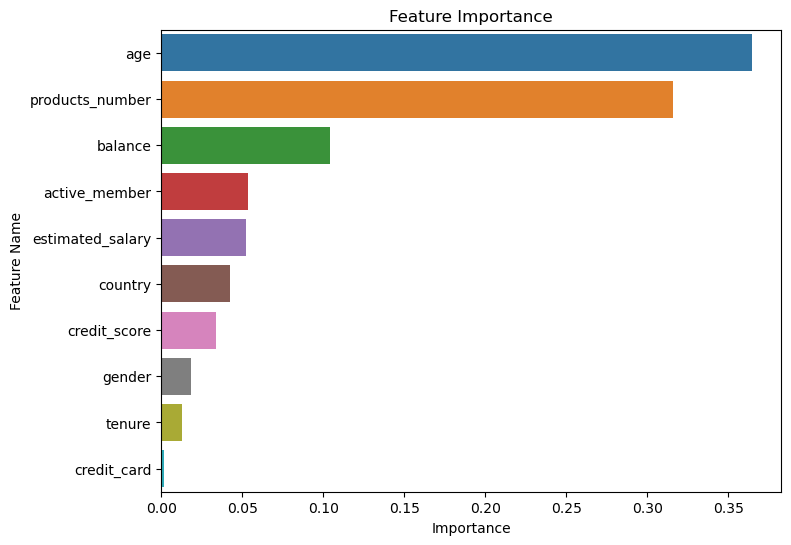

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

Text(0.5, 1.0, 'Accuracy Score : 0.86')

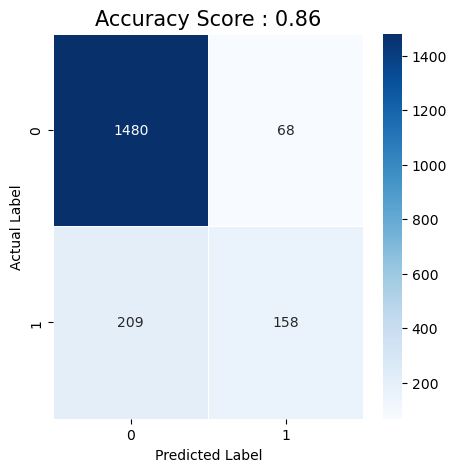

In [60]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=0.5,annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
accuracy_score=dtree.score(X_test,y_test)
rounded_accuracy=round(accuracy_score,2)
title=f'Accuracy Score : {rounded_accuracy}'
plt.title(title,size=15)